In [1]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from scipy import misc, ndimage

from pandas import plotting

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

%matplotlib inline

In [10]:
train_images_dir = '../input/train/images/'
train_mask_dir = '../input/train/masks/'
train_images_filenames = os.listdir(train_images_dir)
train_mask_filenames = os.listdir(train_mask_dir)

In [11]:
selected_for_exps_images = train_images_filenames[:10]
selected_for_exps_masks = train_mask_filenames[:10]

In [5]:
print(selected_for_exps_images)

['4bd876a71c.png', 'd7a53f942a.png', '44edd661a0.png', 'a54d582262.png']


In [16]:
img = misc.imread(os.path.join(train_images_dir, selected_for_exps_images[0]))
mask = misc.imread(os.path.join(train_mask_dir, selected_for_exps_masks[0]))

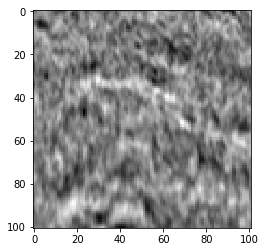

In [17]:
plt.imshow(img)
plt.show()

In [8]:
img.shape

(101, 101, 3)

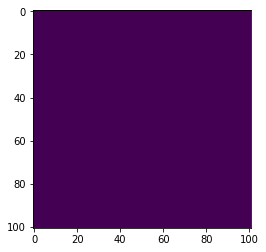

In [18]:
plt.imshow(mask)
plt.show()


 4bd876a71c.png 4bd876a71c.png
mean: 129.02176257229684, min: 0, max: 253


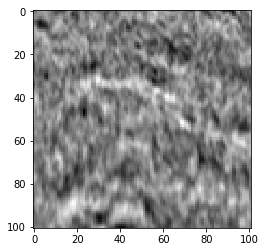

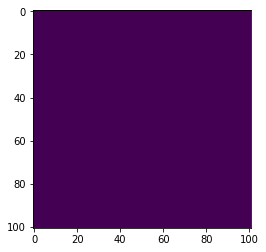

[ -0.35145951   0.09823204   0.54792359   0.99761515   1.4473067
   1.89699825   2.3466898    2.79638136   3.24607291   3.69576446
   4.14545602   4.59514757   5.04483912   5.49453067   5.94422223
   6.39391378   6.84360533   7.29329689   7.74298844   8.19267999
   8.64237155   9.0920631    9.54175465   9.9914462   10.44113776
  10.89082931  11.34052086  11.79021242  12.23990397  12.68959552
  13.13928707  13.58897863  14.03867018  14.48836173  14.93805329
  15.38774484  15.83743639  16.28712795  16.7368195   17.18651105
  17.6362026   18.08589416  18.53558571  18.98527726  19.43496882
  19.88466037  20.33435192  20.78404348  21.23373503  21.68342658
  22.13311813  22.58280969  23.03250124  23.48219279  23.93188435
  24.3815759   24.83126745  25.280959    25.73065056  26.18034211
  26.63003366]


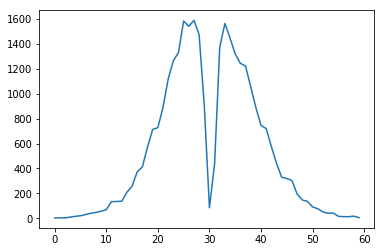

<class 'numpy.ndarray'>


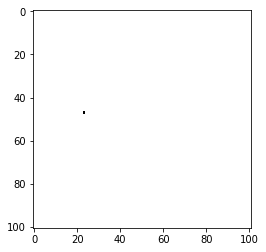


 d7a53f942a.png d7a53f942a.png
mean: 147.9804921086168, min: 0, max: 255


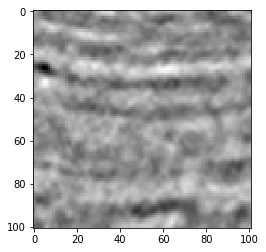

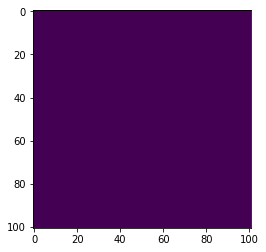

[ -0.06558483   0.37858997   0.82276477   1.26693957   1.71111437
   2.15528917   2.59946397   3.04363877   3.48781357   3.93198837
   4.37616317   4.82033797   5.26451277   5.70868757   6.15286237
   6.59703717   7.04121197   7.48538677   7.92956157   8.37373637
   8.81791117   9.26208597   9.70626077  10.15043557  10.59461037
  11.03878517  11.48295997  11.92713477  12.37130957  12.81548437
  13.25965917  13.70383397  14.14800877  14.59218357  15.03635837
  15.48053317  15.92470797  16.36888277  16.81305757  17.25723237
  17.70140717  18.14558197  18.58975677  19.03393157  19.47810637
  19.92228117  20.36645597  20.81063077  21.25480557  21.69898037
  22.14315517  22.58732997  23.03150477  23.47567957  23.91985437
  24.36402917  24.80820397  25.25237877  25.69655357  26.14072837
  26.58490317]


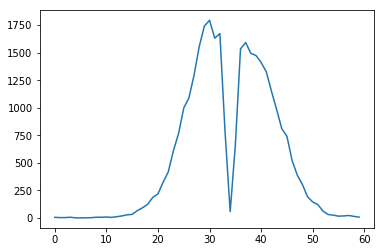

<class 'numpy.ndarray'>


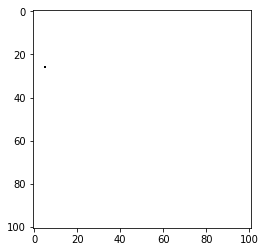


 44edd661a0.png 44edd661a0.png
mean: 69.84403489853936, min: 0, max: 255


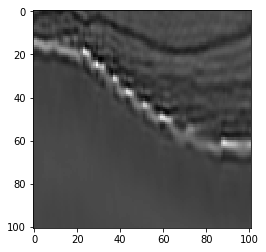

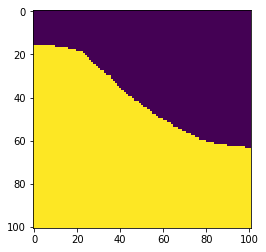

[ -0.23520119   0.20609474   0.64739066   1.08868658   1.5299825
   1.97127842   2.41257434   2.85387027   3.29516619   3.73646211
   4.17775803   4.61905395   5.06034988   5.5016458    5.94294172
   6.38423764   6.82553356   7.26682948   7.70812541   8.14942133
   8.59071725   9.03201317   9.47330909   9.91460501  10.35590094
  10.79719686  11.23849278  11.6797887   12.12108462  12.56238055
  13.00367647  13.44497239  13.88626831  14.32756423  14.76886015
  15.21015608  15.651452    16.09274792  16.53404384  16.97533976
  17.41663568  17.85793161  18.29922753  18.74052345  19.18181937
  19.62311529  20.06441122  20.50570714  20.94700306  21.38829898
  21.8295949   22.27089082  22.71218675  23.15348267  23.59477859
  24.03607451  24.47737043  24.91866636  25.35996228  25.8012582
  26.24255412]


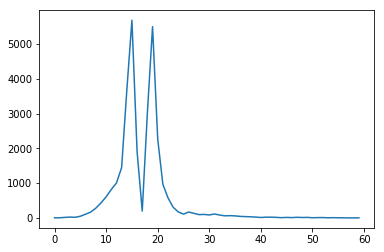

<class 'numpy.ndarray'>


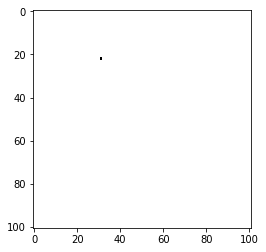


 a54d582262.png a54d582262.png
mean: 88.79502009606901, min: 0, max: 255


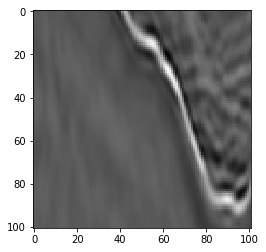

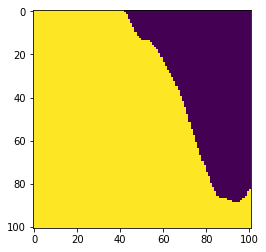

[ -0.38155886   0.07322459   0.52800804   0.98279149   1.43757493
   1.89235838   2.34714183   2.80192528   3.25670873   3.71149218
   4.16627563   4.62105908   5.07584253   5.53062598   5.98540943
   6.44019287   6.89497632   7.34975977   7.80454322   8.25932667
   8.71411012   9.16889357   9.62367702  10.07846047  10.53324392
  10.98802737  11.44281081  11.89759426  12.35237771  12.80716116
  13.26194461  13.71672806  14.17151151  14.62629496  15.08107841
  15.53586186  15.9906453   16.44542875  16.9002122   17.35499565
  17.8097791   18.26456255  18.719346    19.17412945  19.6289129
  20.08369635  20.5384798   20.99326324  21.44804669  21.90283014
  22.35761359  22.81239704  23.26718049  23.72196394  24.17674739
  24.63153084  25.08631429  25.54109774  25.99588118  26.45066463
  26.90544808]


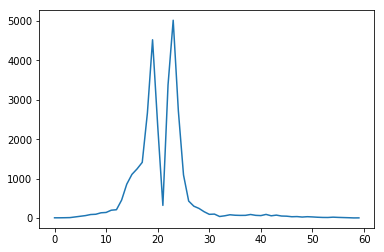

<class 'numpy.ndarray'>


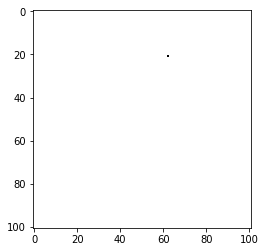

In [31]:
images = []
masks = []
for img_file_name, mask_file_name in zip(selected_for_exps_images, selected_for_exps_masks):
    img = misc.imread(os.path.join(train_images_dir, img_file_name))
    mask = misc.imread(os.path.join(train_mask_dir, mask_file_name))
    images.append(img)
    masks.append(mask)
    print("\n", img_file_name, mask_file_name)
    print("mean: {}, min: {}, max: {}".format(img.mean(), img.min(), img.max()))
    plt.imshow(img)   
    plt.show()
    plt.imshow(mask)
    plt.show()
    hist_mask = (img > img.mean()).astype(np.float)

    hist_mask += 0.1 * img

    hist_img = hist_mask + 0.2 * np.random.randn(*hist_mask.shape)

    hist, bin_edges = np.histogram(hist_img, bins=60)
    print(bin_edges)
    plt.plot(hist)
    plt.show()

    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

    binary_img = img > 0.5
    print(type(binary_img))
    plt.imshow(binary_img.astype(np.float32))
    plt.show()